In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer


In [2]:
import os
from google.colab import drive
drive.mount('/content/drive')

# Load the dataset from Google Drive
file_path = '/content/drive/MyDrive/FAOSTAT_data_en_3-15-2025.csv'
df = pd.read_csv(file_path)


Mounted at /content/drive


In [3]:
# Display basic information and the first few rows
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27845 entries, 0 to 27844
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       27845 non-null  object 
 1   Domain            27845 non-null  object 
 2   Area Code (M49)   27845 non-null  int64  
 3   Area              27845 non-null  object 
 4   Element Code      27845 non-null  int64  
 5   Element           27845 non-null  object 
 6   Item Code (FBS)   27845 non-null  object 
 7   Item              27845 non-null  object 
 8   Year Code         27845 non-null  int64  
 9   Year              27845 non-null  int64  
 10  Unit              27845 non-null  object 
 11  Value             27845 non-null  float64
 12  Flag              27845 non-null  object 
 13  Flag Description  27845 non-null  object 
 14  Note              0 non-null      float64
dtypes: float64(2), int64(4), object(9)
memory usage: 3.2+ MB


(None,
   Domain Code                 Domain  Area Code (M49)   Area  Element Code  \
 0         FBS  Food Balances (2010-)              159  China          5511   
 1         FBS  Food Balances (2010-)              159  China          5611   
 2         FBS  Food Balances (2010-)              159  China          5072   
 3         FBS  Food Balances (2010-)              159  China          5911   
 4         FBS  Food Balances (2010-)              159  China          5301   
 
                     Element Item Code (FBS)                Item  Year Code  \
 0                Production           S2511  Wheat and products       2010   
 1           Import quantity           S2511  Wheat and products       2010   
 2           Stock Variation           S2511  Wheat and products       2010   
 3           Export quantity           S2511  Wheat and products       2010   
 4  Domestic supply quantity           S2511  Wheat and products       2010   
 
    Year    Unit     Value Flag Flag Desc

In [4]:
# Complete Preprocessing Steps
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load the dataset from Google Drive
file_path = '/content/drive/MyDrive/FAOSTAT_data_en_3-15-2025.csv'
data = pd.read_csv(file_path)


# Step 1: Identify Numeric and Categorical Columns
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()

# Step 2: Remove Columns with All Missing Values
# Numeric
cols_with_all_missing = [col for col in numeric_cols if data[col].isnull().all()]
numeric_cols = [col for col in numeric_cols if col not in cols_with_all_missing]

# Categorical
cols_with_all_missing_cat = [col for col in categorical_cols if data[col].isnull().all()]
categorical_cols = [col for col in categorical_cols if col not in cols_with_all_missing_cat]

print("Dropped numeric columns:", cols_with_all_missing)
print("Dropped categorical columns:", cols_with_all_missing_cat)

# Step 3: Impute Missing Values
# Numeric
num_imputer = SimpleImputer(strategy='mean')
data[numeric_cols] = num_imputer.fit_transform(data[numeric_cols])

# Categorical
cat_imputer = SimpleImputer(strategy='most_frequent')
data[categorical_cols] = cat_imputer.fit_transform(data[categorical_cols])

# Step 4: Ensure Proper Data Types
data['Value'] = pd.to_numeric(data['Value'], errors='coerce')  # Convert Value to numeric
data['Year'] = pd.to_numeric(data['Year'], errors='coerce').fillna(0).astype(int)  # Ensure Year is integer
for col in categorical_cols:
    data[col] = data[col].astype('category')  # Convert categorical columns to category type

# Step 5: Handle Outliers
if 'Value' in data.columns:
    upper_limit = data['Value'].quantile(0.95)
    lower_limit = data['Value'].quantile(0.05)
    data['Value'] = np.clip(data['Value'], lower_limit, upper_limit)

# Step 6: Feature Engineering
if 'Import quantity' in data.columns and 'Production' in data.columns:
    data['Imports_to_Production'] = data['Import quantity'] / (data['Production'] + 1e-9)

# Step 7: Encode Categorical Variables
if categorical_cols:
    data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Step 8: Normalize/Scale Numeric Features
if numeric_cols:
    scaler = StandardScaler()
    data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

# Step 9: Train-Test Split
X = data.drop('Value', axis=1)  # Features
y = data['Value']  # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Summary of processed data
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


Dropped numeric columns: ['Note']
Dropped categorical columns: []
X_train shape: (22276, 209)
X_test shape: (5569, 209)
y_train shape: (22276,)
y_test shape: (5569,)


In [5]:
# Keep only relevant data (Export Quantity)
df_exports = df[df["Element"] == "Export quantity"].copy()

# Drop unnecessary columns
df_exports.drop(columns=["Domain Code", "Domain", "Unit", "Flag", "Flag Description", "Note", "Element"], inplace=True)

# Display first few rows
df_exports.head()


,Area Code (M49),Area,Element Code,Item Code (FBS),Item,Year Code,Year,Value
3,159,China,5911,S2511,Wheat and products,2010,2010,925.0
8,159,China,5911,S2511,Wheat and products,2011,2011,1090.0
13,159,China,5911,S2511,Wheat and products,2012,2012,1051.0
18,159,China,5911,S2511,Wheat and products,2013,2013,921.0
23,159,China,5911,S2511,Wheat and products,2014,2014,875.0


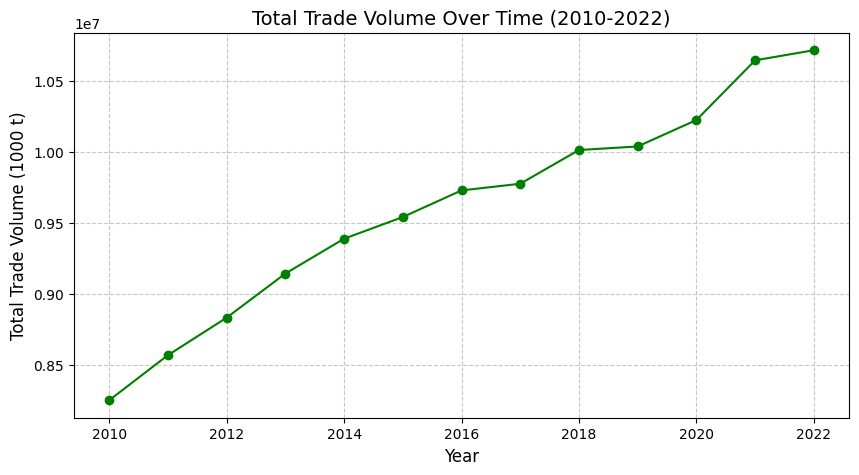

,Year,Area,Value
0,2010,China,41849.52
1,2010,India,17301.58
2,2010,United Arab Emirates,5972.07
3,2010,United Kingdom of Great Britain and Northern I...,16684.57
4,2010,United States of America,178804.46


In [6]:
import matplotlib.pyplot as plt
# Load the dataset from Google Drive
file_path = '/content/drive/MyDrive/FAOSTAT_data_en_3-15-2025.csv'
df = pd.read_csv(file_path)

#  Trade volume trends over time
plt.figure(figsize=(10, 5))
df.groupby("Year")["Value"].sum().plot(marker="o", linestyle="-", color="green")
plt.title("Total Trade Volume Over Time (2010-2022)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Trade Volume (1000 t)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

# Filter the dataset to include only export data
export_data = df[df["Element"] == "Export quantity"].copy()

# Aggregate export data for each country per year
export_summary = export_data.groupby(["Year", "Area"])["Value"].sum().reset_index()

# Display the first few rows of the export data summary
export_summary.head()


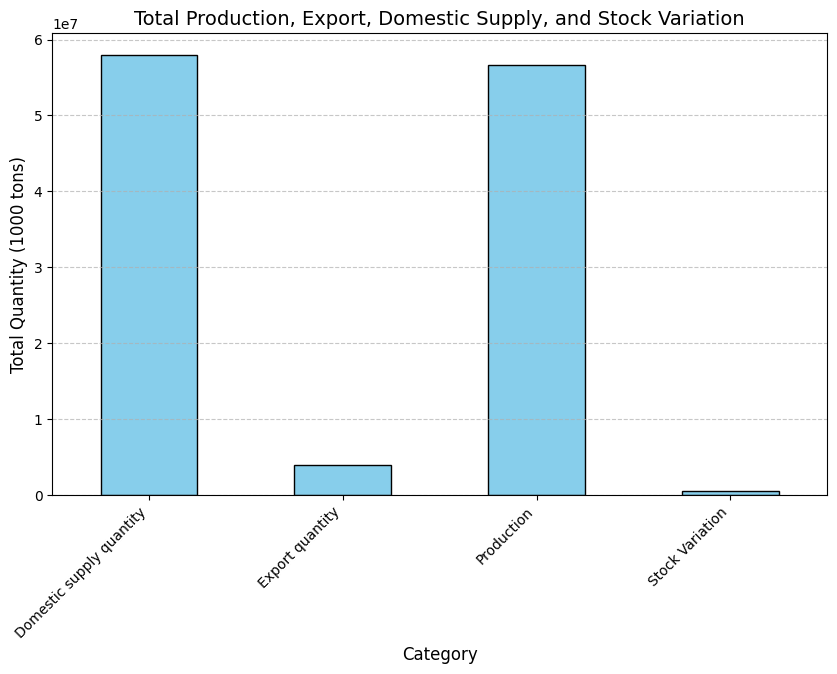

In [7]:
# Aggregate total values for Production, Export, Domestic Supply Quantity, and Stock Variation
categories = ["Production", "Export quantity", "Domestic supply quantity", "Stock Variation"]

# Filter the dataset for relevant categories
df_filtered = df[df["Element"].isin(categories)]

# Group by Element to get total values across all years
df_totals = df_filtered.groupby("Element")["Value"].sum()

# Plot the total values as a bar chart
plt.figure(figsize=(10, 6))
df_totals.plot(kind='bar', color="skyblue", edgecolor="black")

# Formatting
plt.xlabel("Category", fontsize=12)
plt.ylabel("Total Quantity (1000 tons)", fontsize=12)
plt.title("Total Production, Export, Domestic Supply, and Stock Variation", fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()


<Figure size 1200x800 with 0 Axes>

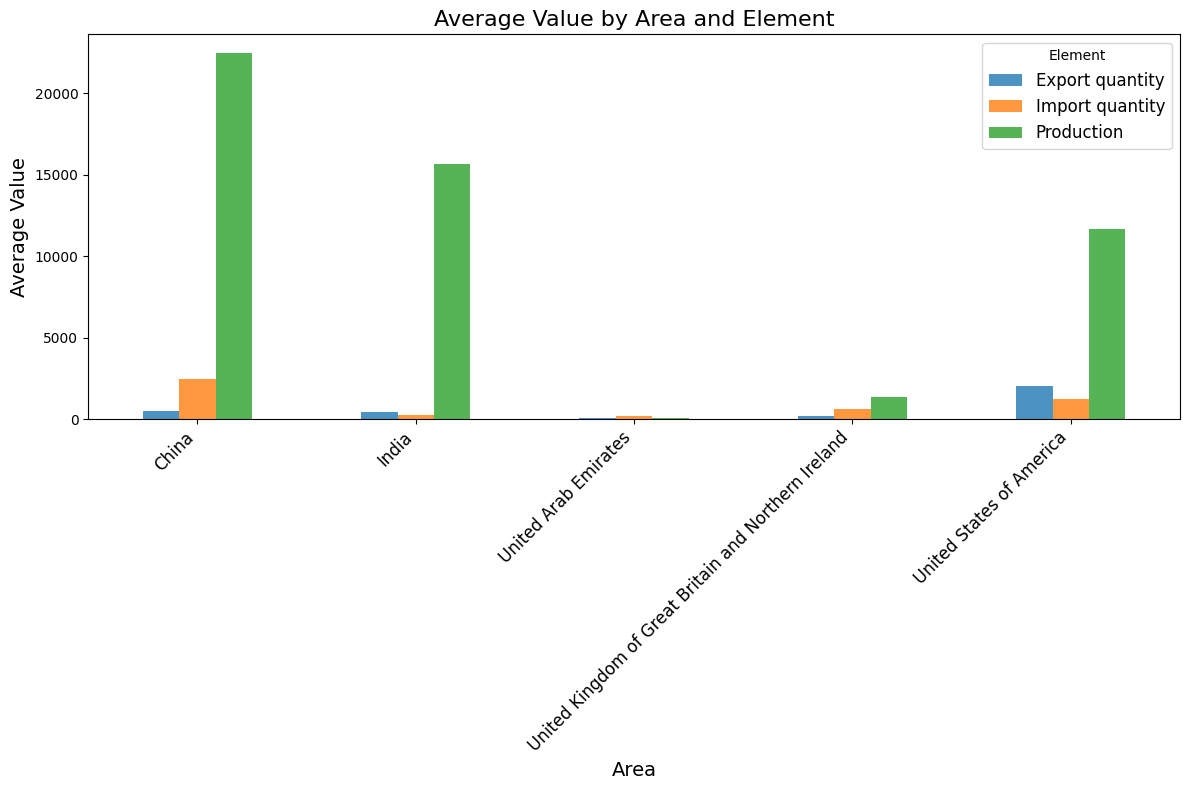

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset from Google Drive
file_path = '/content/drive/MyDrive/FAOSTAT_data_en_3-15-2025.csv'
data = pd.read_csv(file_path)

# List of selected areas and elements
selected_areas = ['United States of America', 'India', 'China', 'United Arab Emirates', 'United Kingdom of Great Britain and Northern Ireland']
selected_elements = ['Production', 'Import quantity', 'Export quantity']

# Filter data for selected areas and elements
filtered_data = data[(data['Area'].isin(selected_areas)) & (data['Element'].isin(selected_elements))]

# Group the filtered data by 'Area' and 'Element' and calculate the mean of 'Value'
grouped_data = filtered_data.groupby(['Area', 'Element'])['Value'].mean().unstack()

# Bar Plot for Selected Areas and Elements
plt.figure(figsize=(12, 8))
grouped_data.plot(kind='bar', figsize=(12, 8), alpha=0.8)
plt.title('Average Value by Area and Element', fontsize=16)
plt.xlabel('Area', fontsize=14)
plt.ylabel('Average Value', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.legend(title='Element', fontsize=12)
plt.tight_layout()
plt.show()



In [9]:
# Load and print dataset preview
print("Raw Dataset Preview:")
print(df.head())  # Show first few rows

# Print column names
print("\nAvailable Columns in Dataset:")
print(df.columns)

# Check unique values in the "Element" column
print("\nUnique values in 'Element' column:")
print(df["Element"].unique())

# Check unique values in the "Item" column
print("\nUnique values in 'Item' column:")
print(df["Item"].unique())


Raw Dataset Preview:
  Domain Code                 Domain  Area Code (M49)   Area  Element Code  \
0         FBS  Food Balances (2010-)              159  China          5511   
1         FBS  Food Balances (2010-)              159  China          5611   
2         FBS  Food Balances (2010-)              159  China          5072   
3         FBS  Food Balances (2010-)              159  China          5911   
4         FBS  Food Balances (2010-)              159  China          5301   

                    Element Item Code (FBS)                Item  Year Code  \
0                Production           S2511  Wheat and products       2010   
1           Import quantity           S2511  Wheat and products       2010   
2           Stock Variation           S2511  Wheat and products       2010   
3           Export quantity           S2511  Wheat and products       2010   
4  Domestic supply quantity           S2511  Wheat and products       2010   

   Year    Unit     Value Flag Flag Descr

In [10]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical features
label_encoders = {}
for col in ["Area", "Item", "Item Code (FBS)"]:
    le = LabelEncoder()
    df_exports[col] = le.fit_transform(df_exports[col])
    label_encoders[col] = le

# Display processed data
df_exports.head()

,Area Code (M49),Area,Element Code,Item Code (FBS),Item,Year Code,Year,Value
3,159,0,5911,0,94,2010,2010,925.0
8,159,0,5911,0,94,2011,2011,1090.0
13,159,0,5911,0,94,2012,2012,1051.0
18,159,0,5911,0,94,2013,2013,921.0
23,159,0,5911,0,94,2014,2014,875.0


In [11]:
# Define features (X) and target (y)
X = df_exports.drop(columns=["Value"])  # Independent variables
y = df_exports["Value"]  # Dependent variable (Export quantity)

# Split data into training (80%) and testing (20%) sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display training set shape
X_train.shape, X_test.shape


((4836, 7), (1210, 7))

In [29]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Load dataset
file_path = '/content/drive/MyDrive/FAOSTAT_data_en_3-15-2025.csv'
df = pd.read_csv(file_path)

# Filter only "Export quantity" data for selected agricultural products
selected_items = ["Maize and products", "Soyabeans", "Wheat and products", "Rice and products", "Vegetables, other"]
df_exports = df[(df["Element"] == "Export quantity") & (df["Item"].isin(selected_items))].copy()

# Drop unnecessary columns
df_exports.drop(columns=["Domain Code", "Domain", "Unit", "Flag", "Flag Description", "Note"], errors="ignore", inplace=True)

# Encode categorical features ("Area" and "Item")
le_area = LabelEncoder()
df_exports["Area"] = le_area.fit_transform(df_exports["Area"])

le_item = LabelEncoder()
df_exports["Item"] = le_item.fit_transform(df_exports["Item"])

# Select relevant features and target variable
df_filtered = df_exports[["Year", "Area", "Item", "Value"]]

# Define features (X) and target variable (y)
X = df_filtered.drop(columns=["Value"])
y = df_filtered["Value"]

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)
f1_rf = f1_score((y_test > y_test.median()).astype(int), (y_pred_rf > np.median(y_pred_rf)).astype(int))

# Train and evaluate XGBoost Regressor
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)
f1_xgb = f1_score((y_test > y_test.median()).astype(int), (y_pred_xgb > np.median(y_pred_xgb)).astype(int))

# Normalize data for LSTM
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape for LSTM (samples, timesteps, features)
X_train_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Build Improved LSTM model
lstm_model = Sequential([
    LSTM(64, activation='relu', return_sequences=True, input_shape=(1, X_train_scaled.shape[1])),
    Dropout(0.3),
    LSTM(64, activation='relu'),
    Dense(32, activation="relu"),
    Dense(1)
])

# Compile LSTM Model with lower learning rate
lstm_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse')

# Train LSTM model with 100 epochs
lstm_model.fit(X_train_lstm, y_train, epochs=100, batch_size=32, verbose=1)

# Predict using LSTM
y_pred_lstm = lstm_model.predict(X_test_lstm).flatten()

# Evaluate LSTM model
rmse_lstm = np.sqrt(mean_squared_error(y_test, y_pred_lstm))
r2_lstm = r2_score(y_test, y_pred_lstm)
f1_lstm = f1_score((y_test > y_test.median()).astype(int), (y_pred_lstm > np.median(y_pred_lstm)).astype(int))

# Store results for comparison
all_models = {
    "Random Forest": {"RMSE": rmse_rf, "R2": r2_rf, "F1 Score": f1_rf},
    "XGBoost": {"RMSE": rmse_xgb, "R2": r2_xgb, "F1 Score": f1_xgb},
    "LSTM": {"RMSE": rmse_lstm, "R2": r2_lstm, "F1 Score": f1_lstm}
}

# Convert results into a DataFrame for better visualization
results_df = pd.DataFrame(all_models).T

# Rank models (lower RMSE is better, higher R2 & F1 Score are better)
results_df["RMSE Rank"] = results_df["RMSE"].rank(ascending=True)
results_df["R2 Rank"] = results_df["R2"].rank(ascending=False)
results_df["F1 Score Rank"] = results_df["F1 Score"].rank(ascending=False)

# Compute final ranking score (lower total rank = better model)
results_df["Final Score"] = results_df["RMSE Rank"] + results_df["R2 Rank"] + results_df["F1 Score Rank"]
results_df = results_df.sort_values(by="Final Score")

# Display the ranked models
print(results_df)


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 322519936.0000
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 260628512.0000 
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 283885984.0000 
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 283320832.0000 
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 260548096.0000 
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 304830080.0000 
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 276838656.0000 
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 250373904.0000 
Epoch 9/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 244207584.0000 
Epoch 10/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 263466576.0000 
Epoch 11/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 226905184.0000 
Epoch 12/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 225482432.0000 
Epoch 13/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 219388336.0000 
Epoch 14/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 29

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 162ms/step
                       RMSE        R2  F1 Score  RMSE Rank  R2 Rank  \
Random Forest   3313.059475  0.952839   0.93750        1.0      1.0   
XGBoost         4112.605598  0.927329   0.87500        2.0      2.0   
LSTM           14025.651543  0.154775   0.53125        3.0      3.0   

               F1 Score Rank  Final Score  
Random Forest            1.0          3.0  
XGBoost                  2.0          6.0  
LSTM                     3.0          9.0  


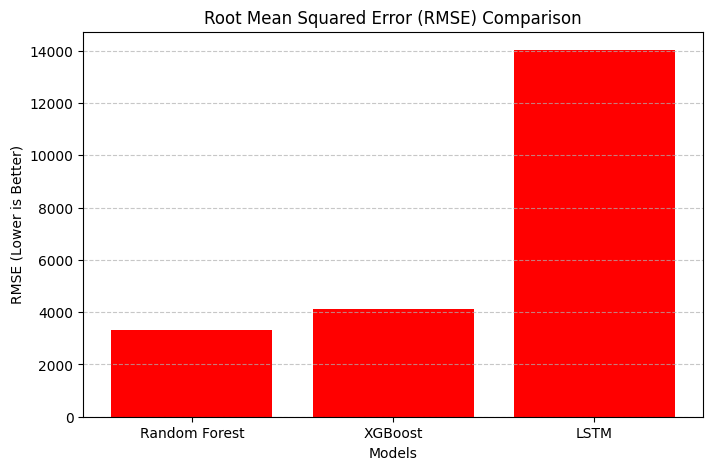

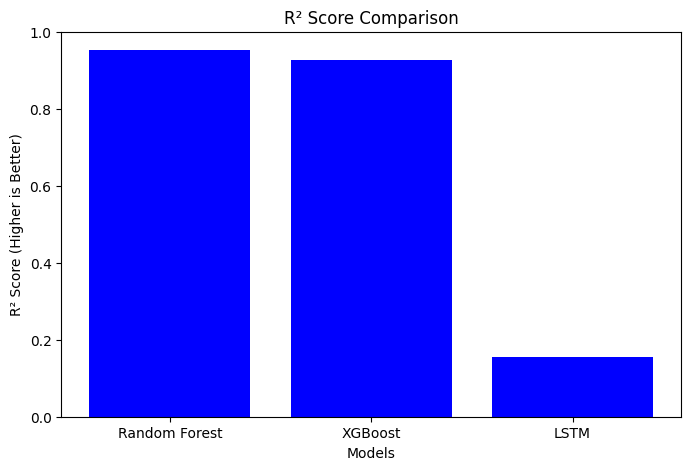

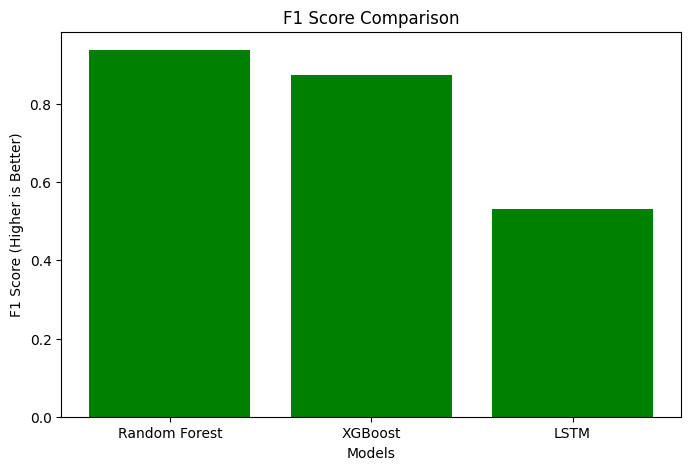

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ["Random Forest", "XGBoost", "LSTM"]

# Performance metrics
rmse_values = [3313.05, 4112.60, 14025.65]  # Lower is better
r2_values = [0.9528, 0.9273, 0.1547]  # Higher is better
f1_scores = [0.9375, 0.8750, 0.5312]  # Higher is better

# Bar width
bar_width = 0.2
x = np.arange(len(models))


# Create a figure for RMSE
plt.figure(figsize=(8, 5))
plt.bar(models, rmse_values, color='red')
plt.xlabel("Models")
plt.ylabel("RMSE (Lower is Better)")
plt.title("Root Mean Squared Error (RMSE) Comparison")
plt.grid(axis='y', linestyle="--", alpha=0.7)
plt.show()

# Create a figure for R² Score
plt.figure(figsize=(8, 5))
plt.bar(models, r2_values, color='blue')
plt.xlabel("Models")
plt.ylabel("R² Score (Higher is Better)")
plt.title("R² Score Comparison")
plt.show()

# Create a figure for F1 Score
plt.figure(figsize=(8, 5))
plt.bar(models, f1_scores, color='green')
plt.xlabel("Models")
plt.ylabel("F1 Score (Higher is Better)")
plt.title("F1 Score Comparison")
plt.show()



Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 324735456.0000
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 272803200.0000 
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 262882368.0000 
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 210626720.0000 
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 313205440.0000 
Epoch 6/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 217174816.0000 
Epoch 7/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 258749408.0000 
Epoch 8/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 276047904.0000 
Epoch 9/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 239133888.0000 
Epoch 10/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 222896352.0000 
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 411ms/step


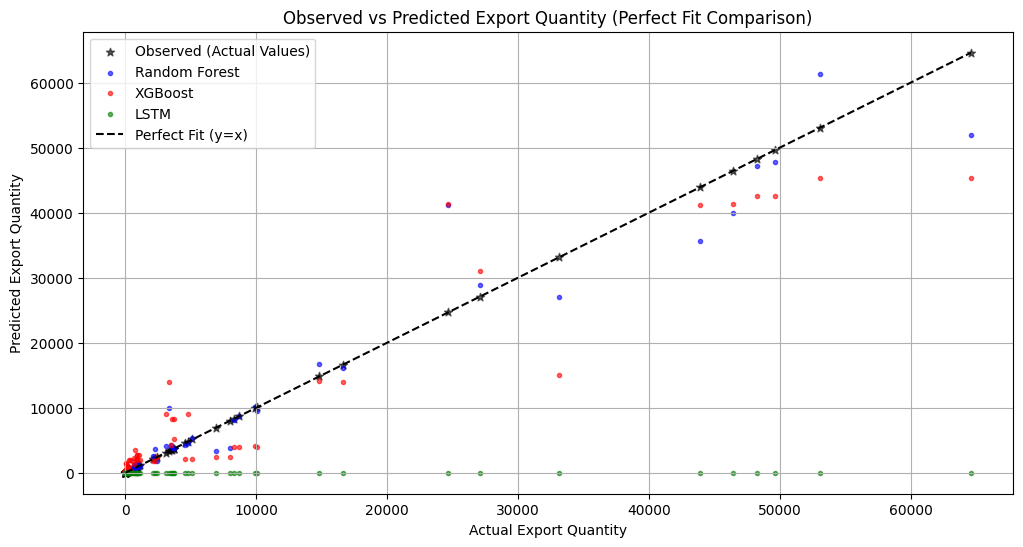

In [15]:
# Re-import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Reload the dataset
file_path = '/content/drive/MyDrive/FAOSTAT_data_en_3-15-2025.csv'
df = pd.read_csv(file_path)

# Filter only "Export quantity" data for selected agricultural products
selected_items = ["Maize and products", "Soyabeans", "Wheat and products", "Rice and products", "Vegetables, other"]
df_exports = df[(df["Element"] == "Export quantity") & (df["Item"].isin(selected_items))]

# Remove unnecessary columns
df_exports = df_exports.drop(columns=["Domain Code", "Domain", "Unit", "Flag", "Flag Description", "Note"], errors="ignore")

# Encode categorical variables
df_encoded = pd.get_dummies(df_exports, columns=["Area", "Item"], drop_first=True)

# Ensure all remaining columns are numeric
df_encoded = df_encoded.apply(pd.to_numeric, errors='coerce')

# Fill missing values (if any) with 0
df_encoded.fillna(0, inplace=True)

# Define features (X) and target variable (y)
X = df_encoded.drop(columns=["Value"])
y = df_encoded["Value"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=50, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# Train XGBoost model with optimized parameters
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", n_estimators=30, learning_rate=0.1, max_depth=3, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)

# Normalize data for LSTM
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape for LSTM (samples, timesteps, features)
X_train_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Build LSTM model
lstm_model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(1, X_train_scaled.shape[1])),
    Dropout(0.2),
    LSTM(50, activation='relu'),
    Dense(1)
])

lstm_model.compile(optimizer='adam', loss='mse')

# Train LSTM model
lstm_model.fit(X_train_lstm, y_train, epochs=10, batch_size=32, verbose=1)

# Predict using LSTM
lstm_predictions = lstm_model.predict(X_test_lstm).flatten()

# Perfect prediction plot (y = x) with observed values
plt.figure(figsize=(12, 6))

# Scatter plot for observed actual values
plt.scatter(y_test, y_test, alpha=0.6, label="Observed (Actual Values)", color='black', marker='*')

# Scatter plot for Random Forest predictions
plt.scatter(y_test, rf_predictions, alpha=0.6, label="Random Forest", color='blue', marker='.')

# Scatter plot for XGBoost predictions
plt.scatter(y_test, xgb_predictions, alpha=0.6, label="XGBoost", color='red', marker='.')

# Scatter plot for LSTM predictions
plt.scatter(y_test, lstm_predictions, alpha=0.6, label="LSTM", color='green', marker='.')

# Perfect prediction line (y = x)
min_val = min(y_test.min(), rf_predictions.min(), xgb_predictions.min(), lstm_predictions.min())
max_val = max(y_test.max(), rf_predictions.max(), xgb_predictions.max(), lstm_predictions.max())
plt.plot([min_val, max_val], [min_val, max_val], linestyle="--", color="black", label="Perfect Fit (y=x)")

# Formatting
plt.xlabel("Actual Export Quantity")
plt.ylabel("Predicted Export Quantity")
plt.title("Observed vs Predicted Export Quantity (Perfect Fit Comparison)")
plt.legend()
plt.grid(True)

# Show plot
plt.show()


In [16]:
# Filter export data from 2010 onwards
historical_export_df = df_exports[df_exports["Year"] >= 2010]

# Aggregate actual export values per country per year
historical_export_summary = historical_export_df.groupby(["Year", "Area"])["Value"].sum().reset_index()

# Pivot the table so each row represents a year, and each column represents a country
historical_export_pivot = historical_export_summary.pivot(index="Year", columns="Area", values="Value")

# Display the historical export values year-wise for each country
from IPython.display import display
display(historical_export_pivot)


Area,China,India,United Arab Emirates,United Kingdom of Great Britain and Northern Ireland,United States of America
Year,,,,,
2010,10294.0,6732.0,1975.0,5301.0,133153.0
2011,11106.0,13445.0,514.0,4525.0,124678.0
2012,10173.0,26299.0,879.0,3903.0,113245.0
2013,10505.0,30301.0,987.0,2775.0,108533.0
2014,10358.0,26354.0,676.0,3322.0,136666.0
2015,10251.0,20044.0,629.0,4309.0,126358.0
2016,10705.0,17414.0,676.0,5206.0,150259.0
2017,12927.0,20952.0,517.0,3119.0,147866.0
2018,15328.0,20879.0,896.0,2854.0,150219.0


In [17]:
# Filter export data from 2010 onwards
historical_export_df = df_exports[df_exports["Year"] >= 2010]

# Aggregate actual export values per country per year
historical_export_summary = historical_export_df.groupby(["Year", "Area"])["Value"].sum().reset_index()

# Pivot the table so each row represents a year, and each column represents a country
historical_export_pivot = historical_export_summary.pivot(index="Year", columns="Area", values="Value")

# Display the historical export values year-wise for each country
from IPython.display import display
display(historical_export_pivot)


Area,China,India,United Arab Emirates,United Kingdom of Great Britain and Northern Ireland,United States of America
Year,,,,,
2010,10294.0,6732.0,1975.0,5301.0,133153.0
2011,11106.0,13445.0,514.0,4525.0,124678.0
2012,10173.0,26299.0,879.0,3903.0,113245.0
2013,10505.0,30301.0,987.0,2775.0,108533.0
2014,10358.0,26354.0,676.0,3322.0,136666.0
2015,10251.0,20044.0,629.0,4309.0,126358.0
2016,10705.0,17414.0,676.0,5206.0,150259.0
2017,12927.0,20952.0,517.0,3119.0,147866.0
2018,15328.0,20879.0,896.0,2854.0,150219.0


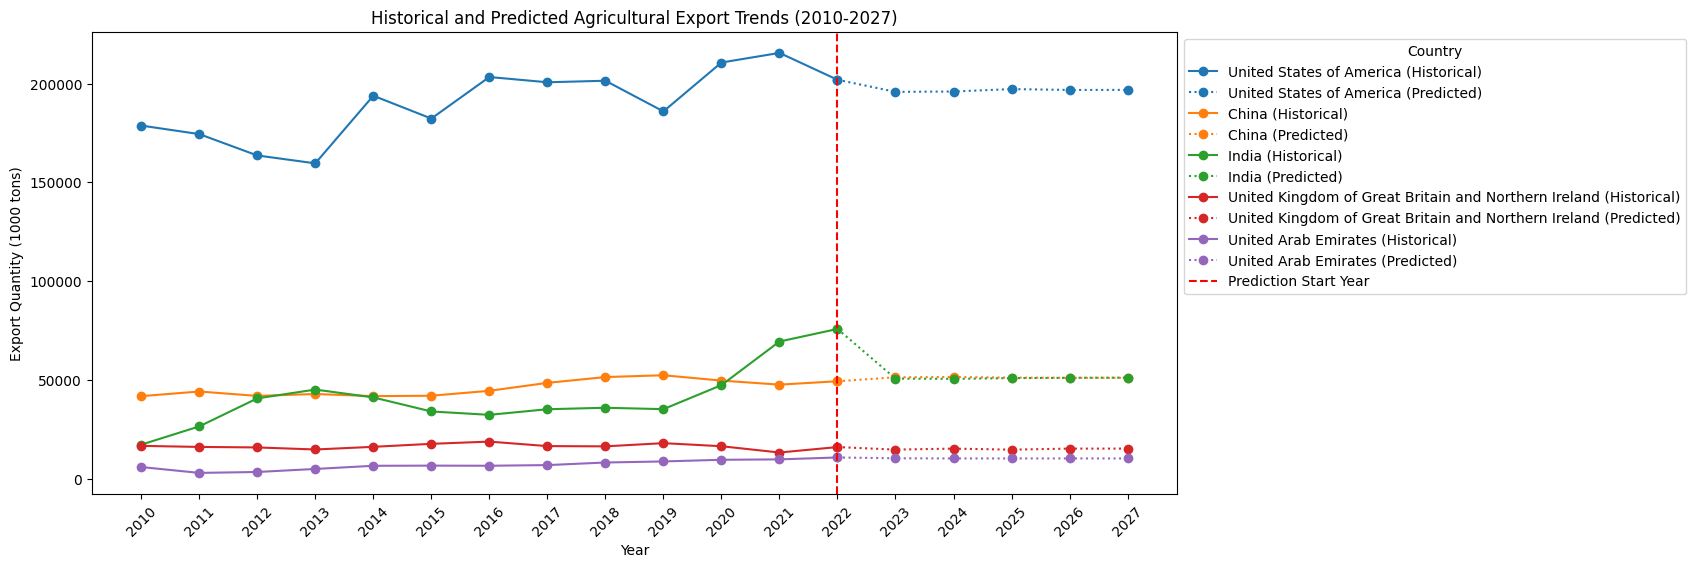

In [18]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Filter only export quantity data
df_exports = df[df["Element"] == "Export quantity"].copy()

# Drop unnecessary columns
df_exports.drop(columns=["Domain Code", "Domain", "Unit", "Flag", "Flag Description", "Note", "Element"], inplace=True)

# Encode categorical features (Area)
label_encoders = {}
le = LabelEncoder()
df_exports["Area"] = le.fit_transform(df_exports["Area"])
label_encoders["Area"] = le

# Sort data by Area and Year
df_exports = df_exports.sort_values(by=["Area", "Year"])

# Aggregate actual export values per country per year (from 2010 onwards)
historical_export_summary = df_exports[df_exports["Year"] >= 2010].groupby(["Year", "Area"])["Value"].sum().reset_index()

# Create lag features (previous years' exports as predictors)
df_model = historical_export_summary.copy()
df_model = df_model.sort_values(by=["Area", "Year"])
df_model["Export_Lag_1"] = df_model.groupby("Area")["Value"].shift(1)
df_model["Export_Lag_2"] = df_model.groupby("Area")["Value"].shift(2)
df_model["Export_Lag_3"] = df_model.groupby("Area")["Value"].shift(3)

# Drop NaN values caused by shifting
df_model.dropna(inplace=True)

# Define features (X) and target (y)
features = ["Year", "Export_Lag_1", "Export_Lag_2", "Export_Lag_3"]
target = "Value"

X = df_model[features]
y = df_model[target]

# Split into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict future exports for the next 5 years
future_years = 5
future_predictions = []
current_year = df_model["Year"].max()

# Use the last known data as a base for future predictions
future_df = df_model[df_model["Year"] == current_year].copy()

for i in range(1, future_years + 1):
    next_year = current_year + i
    future_df["Year"] = next_year  # Update year

    # Shift lag features for future prediction
    future_df["Export_Lag_3"] = future_df["Export_Lag_2"]
    future_df["Export_Lag_2"] = future_df["Export_Lag_1"]
    future_df["Export_Lag_1"] = future_df["Value"]  # Last year's export

    # Drop original target variable
    future_df.drop(columns=["Value"], inplace=True)

    # Predict exports for the next year
    future_df["Predicted_Export"] = rf_model.predict(future_df[features])

    # Save the predictions
    future_predictions.append(future_df.copy())

    # Update Value column for next year's prediction
    future_df["Value"] = future_df["Predicted_Export"]

# Combine all future predictions into a single DataFrame
future_export_df = pd.concat(future_predictions)

# Pivot predicted values so each country has its own column
future_export_pivot = future_export_df.pivot(index="Year", columns="Area", values="Predicted_Export")

# Convert encoded country names back to original names for proper labeling
future_export_pivot.columns = label_encoders["Area"].inverse_transform(future_export_pivot.columns.astype(int))
historical_export_pivot = historical_export_summary.pivot(index="Year", columns="Area", values="Value")
historical_export_pivot.columns = label_encoders["Area"].inverse_transform(historical_export_pivot.columns.astype(int))

# Recombine historical and predicted export data
full_export_data = pd.concat([historical_export_pivot, future_export_pivot])

# Select top 5 exporting countries based on total predicted exports
top_countries = full_export_data.sum().sort_values(ascending=False).head(5).index

# Create the improved plot with consistent colors for each country
plt.figure(figsize=(14, 6))

# Generate a color map for consistency
colors = plt.cm.tab10.colors  # Use a predefined colormap
color_map = {country: colors[i % len(colors)] for i, country in enumerate(top_countries)}

# Plot historical and predicted export trends with the same color per country
for country in top_countries:
    plt.plot(full_export_data.index[:len(historical_export_pivot)],
             full_export_data[country][:len(historical_export_pivot)],
             marker='o', linestyle='-', color=color_map[country], label=f"{country} (Historical)")

    plt.plot(full_export_data.index[len(historical_export_pivot)-1:],
             full_export_data[country][len(historical_export_pivot)-1:],
             marker='o', linestyle='dotted', color=color_map[country], label=f"{country} (Predicted)")

# Formatting
plt.xlabel("Year")
plt.ylabel("Export Quantity (1000 tons)")
plt.title("Historical and Predicted Agricultural Export Trends (2010-2027)")
plt.axvline(x=current_year, color='red', linestyle="--", label="Prediction Start Year")

# Ensure X-axis is in proper integer format
plt.xticks(full_export_data.index, rotation=45)
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}'))

plt.legend(title="Country", loc="upper left", bbox_to_anchor=(1, 1))


# Show the improved plot with properly labeled country names and consistent colors
plt.show()


In [19]:
display(future_export_pivot)

,China,India,United Arab Emirates,United Kingdom of Great Britain and Northern Ireland,United States of America
Year,,,,,
2023,51394.6366,50736.0462,10395.6953,14795.9748,195871.3110
2024,51540.5025,50603.8989,10312.4916,15300.8394,196039.4265
2025,51222.8749,50967.7966,10312.4916,14768.6056,197264.1490
2026,51124.9354,51130.7991,10312.4916,15300.8394,196836.1334
2027,51124.9354,51227.8561,10312.4916,15300.8394,196861.4346


In [20]:
display(historical_export_pivot)

,China,India,United Arab Emirates,United Kingdom of Great Britain and Northern Ireland,United States of America
Year,,,,,
2010,41849.52,17301.58,5972.07,16684.57,178804.46
2011,44196.75,26537.17,3005.49,16154.89,174487.32
2012,41972.45,40728.34,3465.97,15893.47,163678.52
2013,42934.21,45183.12,5003.15,14854.38,159677.75
2014,41851.75,41206.11,6601.00,16202.66,193906.88
2015,42060.21,34095.69,6682.69,17719.84,182351.38
2016,44558.54,32393.25,6628.11,18846.43,203373.29
2017,48575.07,35229.51,6953.41,16565.05,200718.41
2018,51510.60,35973.80,8267.07,16444.08,201495.43


In [21]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Load the dataset correctly
file_path = '/content/drive/MyDrive/FAOSTAT_data_en_3-15-2025.csv'
data = pd.read_csv(file_path)

# Ensure 'Element' column exists and filter only "Export quantity"
if "Element" in data.columns and "Item" in data.columns:
    df_exports = data[data["Element"] == "Export quantity"].copy()
else:
    raise ValueError("Column 'Element' or 'Item' not found in the dataset!")

# Drop missing values in 'Item' column before encoding
df_exports = df_exports.dropna(subset=["Item"])

# Encode categorical 'Item' values
le_item = LabelEncoder()
df_exports["Item"] = le_item.fit_transform(df_exports["Item"])

# Retrieve and decode the unique agricultural goods (Items)
agriculture_goods_encoded = df_exports["Item"].unique()
agriculture_goods_decoded = le_item.inverse_transform(agriculture_goods_encoded)

# Display the list of unique agricultural goods
print("Unique Agricultural Goods in the Dataset:")
for item in sorted(agriculture_goods_decoded):
    print("-", item)


Unique Agricultural Goods in the Dataset:
- Alcohol, Non-Food
- Apples and products
- Aquatic Animals, Others
- Aquatic Plants
- Bananas
- Barley and products
- Beans
- Beer
- Beverages, Alcoholic
- Beverages, Fermented
- Bovine Meat
- Butter, Ghee
- Cassava and products
- Cephalopods
- Cereals, other
- Citrus, Other
- Cloves
- Cocoa Beans and products
- Coconut Oil
- Coconuts - Incl Copra
- Coffee and products
- Cottonseed
- Cottonseed Oil
- Cream
- Crustaceans
- Dates
- Demersal Fish
- Eggs
- Fats, Animals, Raw
- Fish, Body Oil
- Fish, Liver Oil
- Freshwater Fish
- Fruits, other
- Grapefruit and products
- Grapes and products (excl wine)
- Groundnut Oil
- Groundnuts
- Honey
- Infant food
- Lemons, Limes and products
- Maize Germ Oil
- Maize and products
- Marine Fish, Other
- Meat, Other
- Milk - Excluding Butter
- Millet and products
- Miscellaneous
- Molluscs, Other
- Mutton & Goat Meat
- Nuts and products
- Oats
- Offals, Edible
- Oilcrops Oil, Other
- Oilcrops, Other
- Olive Oil


In [22]:
# Re-load the dataset after execution state reset
import pandas as pd
file_path = '/content/drive/MyDrive/FAOSTAT_data_en_3-15-2025.csv'

df = pd.read_csv(file_path)

# Re-run the top 5 exporting items calculation

# Group by Item and sum the export values
top_items = df[df["Element"] == "Export quantity"].groupby("Item")["Value"].sum()

# Get the top 5 items
top_5_items = top_items.nlargest(5).reset_index()

# Display results
top_5_items


,Item,Value
0,Maize and products,701080.0
1,Soyabeans,649054.0
2,Wheat and products,476398.0
3,Rice and products,314321.0
4,"Vegetables, other",187460.0


In [23]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Reload the dataset
file_path = '/content/drive/MyDrive/FAOSTAT_data_en_3-15-2025.csv'
df = pd.read_csv(file_path)

# Filter only export quantity data
df_exports = df[df["Element"] == "Export quantity"].copy()

# Drop unnecessary columns
df_exports.drop(columns=["Domain Code", "Domain", "Unit", "Flag", "Flag Description", "Note", "Element"], inplace=True)

# Encode categorical features (Area and Item)
label_encoders = {}

# Encoding 'Area'
le_area = LabelEncoder()
df_exports["Area"] = le_area.fit_transform(df_exports["Area"])
label_encoders["Area"] = le_area

# Encoding 'Item'
le_item = LabelEncoder()
df_exports["Item"] = le_item.fit_transform(df_exports["Item"])
label_encoders["Item"] = le_item


selected_items = [
    "Maize and products", "Soyabeans", "Wheat and products","Rice and products", "Vegetables, other"
]

# Convert selected item names into encoded values
selected_item_codes = le_item.transform([item for item in selected_items if item in le_item.classes_])

# Filter actual export values for selected items
actual_export_values = df_exports[df_exports["Item"].isin(selected_item_codes)]

# Aggregate actual export values per year and item
actual_export_summary = actual_export_values.groupby(["Year", "Item"])["Value"].sum().unstack()

# Convert encoded item names back to original names for better readability
actual_export_summary.columns = le_item.inverse_transform(actual_export_summary.columns)

# Display actual export values for selected items
from IPython.display import display
display(actual_export_summary)


,Maize and products,Rice and products,Soyabeans,"Vegetables, other",Wheat and products
Year,,,,,
2010,54802.0,10710.0,42601.0,11965.0,37377.0
2011,51168.0,12961.0,34614.0,13323.0,42202.0
2012,37178.0,21399.0,44293.0,12765.0,38864.0
2013,30209.0,22846.0,39599.0,13222.0,47225.0
2014,54465.0,21607.0,50092.0,13584.0,37628.0
2015,46787.0,21843.0,48640.0,13620.0,30701.0
2016,57713.0,20662.0,58132.0,13915.0,33838.0
2017,55109.0,24793.0,55872.0,14835.0,34772.0
2018,73186.0,24634.0,46859.0,15404.0,30093.0


In [24]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
# Load the dataset correctly
file_path = '/content/drive/MyDrive/FAOSTAT_data_en_3-15-2025.csv'
df = pd.read_csv(file_path)
# Filter only export quantity data
df_exports = df[df["Element"] == "Export quantity"].copy()

selected_items = [
    "Maize and products", "Soyabeans", "Wheat and products","Rice and products", "Vegetables, other"

]

# Encode categorical features (Item)
le_item = LabelEncoder()
df_exports["Item"] = le_item.fit_transform(df_exports["Item"])

# Retrieve the encoded values for the selected items
selected_items_encoded = le_item.transform([item for item in selected_items if item in le_item.classes_])

# Filter dataset for selected items
df_selected = df_exports[df_exports["Item"].isin(selected_items_encoded)]

# Encode categorical features (Area) for country labels
le_area = LabelEncoder()
df_selected["Area"] = le_area.fit_transform(df_selected["Area"])

# Aggregate actual export values per country per year
df_selected_summary = df_selected.groupby(["Year", "Area", "Item"])["Value"].sum().reset_index()

# Create lag features (previous years' exports as predictors)
df_selected_summary = df_selected_summary.sort_values(by=["Area", "Item", "Year"])
df_selected_summary["Export_Lag_1"] = df_selected_summary.groupby(["Area", "Item"])["Value"].shift(1)
df_selected_summary["Export_Lag_2"] = df_selected_summary.groupby(["Area", "Item"])["Value"].shift(2)
df_selected_summary["Export_Lag_3"] = df_selected_summary.groupby(["Area", "Item"])["Value"].shift(3)

# Drop NaN values caused by shifting
df_selected_summary.dropna(inplace=True)

# Define features (X) and target (y)
features = ["Year", "Export_Lag_1", "Export_Lag_2", "Export_Lag_3"]
target = "Value"

X = df_selected_summary[features]
y = df_selected_summary[target]

# Split into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict future exports for the next 5 years
future_years = 5
future_predictions = []
current_year = df_selected_summary["Year"].max()

# Use the last known data as a base for future predictions
future_df = df_selected_summary[df_selected_summary["Year"] == current_year].copy()

for i in range(1, future_years + 1):
    next_year = current_year + i
    future_df["Year"] = next_year  # Update year

    # Shift lag features for future prediction
    future_df["Export_Lag_3"] = future_df["Export_Lag_2"]
    future_df["Export_Lag_2"] = future_df["Export_Lag_1"]
    future_df["Export_Lag_1"] = future_df["Value"]  # Last year's export

    # Drop original target variable
    future_df.drop(columns=["Value"], inplace=True)

    # Predict exports for the next year
    future_df["Predicted_Export"] = rf_model.predict(future_df[features])

    # Save the predictions
    future_predictions.append(future_df.copy())

    # Update Value column for next year's prediction
    future_df["Value"] = future_df["Predicted_Export"]

# Combine all future predictions into a single DataFrame
future_export_df = pd.concat(future_predictions)

# Convert encoded area and item names back to original names
future_export_df["Area"] = le_area.inverse_transform(future_export_df["Area"])
future_export_df["Item"] = le_item.inverse_transform(future_export_df["Item"])

# Aggregate future predicted values per item and year
future_export_summary = future_export_df.groupby(["Year", "Item"])["Predicted_Export"].sum().reset_index()

# Pivot the table for better visualization
future_export_pivot = future_export_summary.pivot(index="Year", columns="Item", values="Predicted_Export")

# Display the future predicted exports for selected items
import pandas as pd
from IPython.display import display

display(future_export_pivot)


<ipython-input-24-90110ee4ba9e>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected["Area"] = le_area.fit_transform(df_selected["Area"])


Item,Maize and products,Rice and products,Soyabeans,"Vegetables, other",Wheat and products
Year,,,,,
2023,59269.69,33671.99,55937.40,18187.98,38934.57
2024,67560.70,35568.88,54535.69,16203.92,40586.47
2025,57575.31,35535.05,60511.50,16055.73,39240.43
2026,65401.81,34788.26,54071.58,16583.66,38684.28
2027,59832.37,35620.54,62419.74,17381.91,37343.35


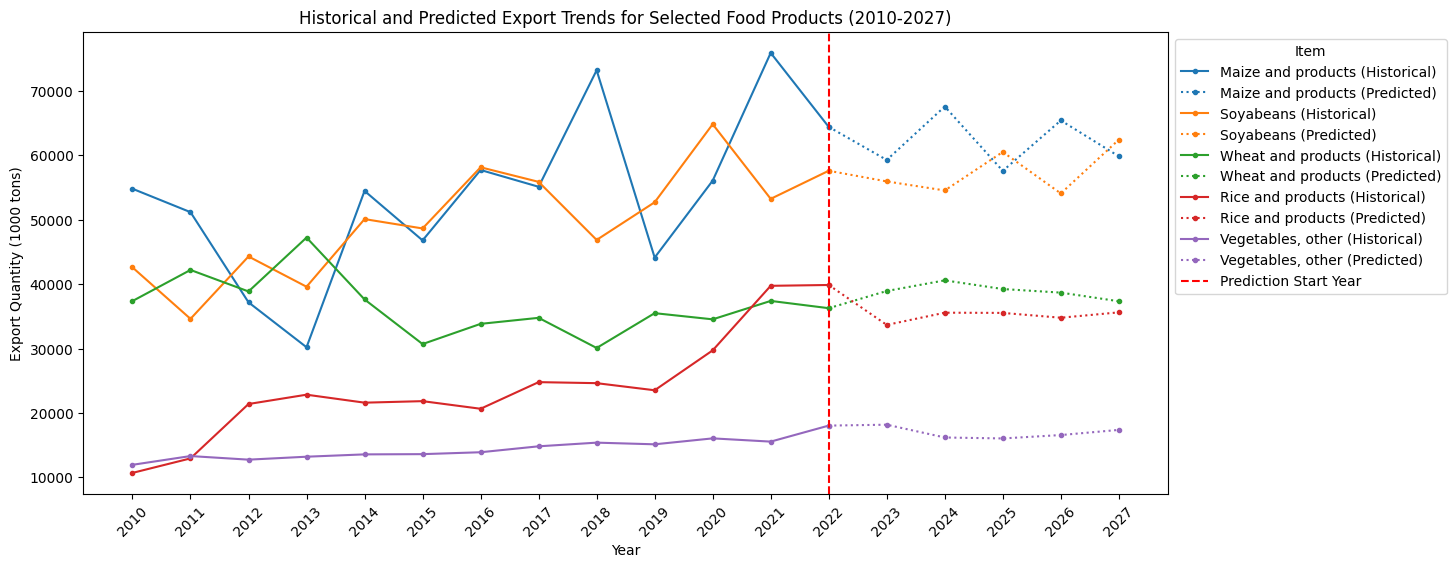

In [25]:
extended_future_export = future_export_pivot.copy()

# Insert the last known value from 2022 for each item to avoid gaps
for item in selected_items:
    if item in actual_export_summary.columns and item in extended_future_export.columns:
        if 2022 in actual_export_summary.index:  # Ensure 2022 data exists
            last_actual_value = actual_export_summary.loc[2022, item]
            extended_future_export.loc[2022, item] = last_actual_value  # Carry forward last known values

# Re-sort the index so 2022 transitions smoothly into 2023
extended_future_export = extended_future_export.sort_index()

# Generate a full timeline of years from historical data to predicted data
full_years = list(range(actual_export_summary.index.min(), extended_future_export.index.max() + 1))

# Replot the data with the fixed transition and complete time range
plt.figure(figsize=(14, 6))

# Generate a color map for consistency
colors = plt.cm.tab10.colors
color_map = {item: colors[i % len(colors)] for i, item in enumerate(selected_items)}

# Plot historical and predicted export trends with the same color per item
for item in selected_items:
    if item in actual_export_summary.columns:
        plt.plot(actual_export_summary.index, actual_export_summary[item],
                 marker='.', linestyle='-', color=color_map[item], label=f"{item} (Historical)")

    if item in extended_future_export.columns:
        plt.plot(extended_future_export.index, extended_future_export[item],
                 marker='.', linestyle='dotted', color=color_map[item], label=f"{item} (Predicted)")

# Formatting
plt.xlabel("Year")
plt.ylabel("Export Quantity (1000 tons)")
plt.title("Historical and Predicted Export Trends for Selected Food Products (2010-2027)")
plt.axvline(x=2022, color='red', linestyle="--", label="Prediction Start Year")

# Ensure X-axis has all years
plt.xticks(full_years, rotation=45)
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}'))

plt.legend(title="Item", loc="upper left", bbox_to_anchor=(1, 1))

# Show the improved plot with a complete timeline of years
plt.show()


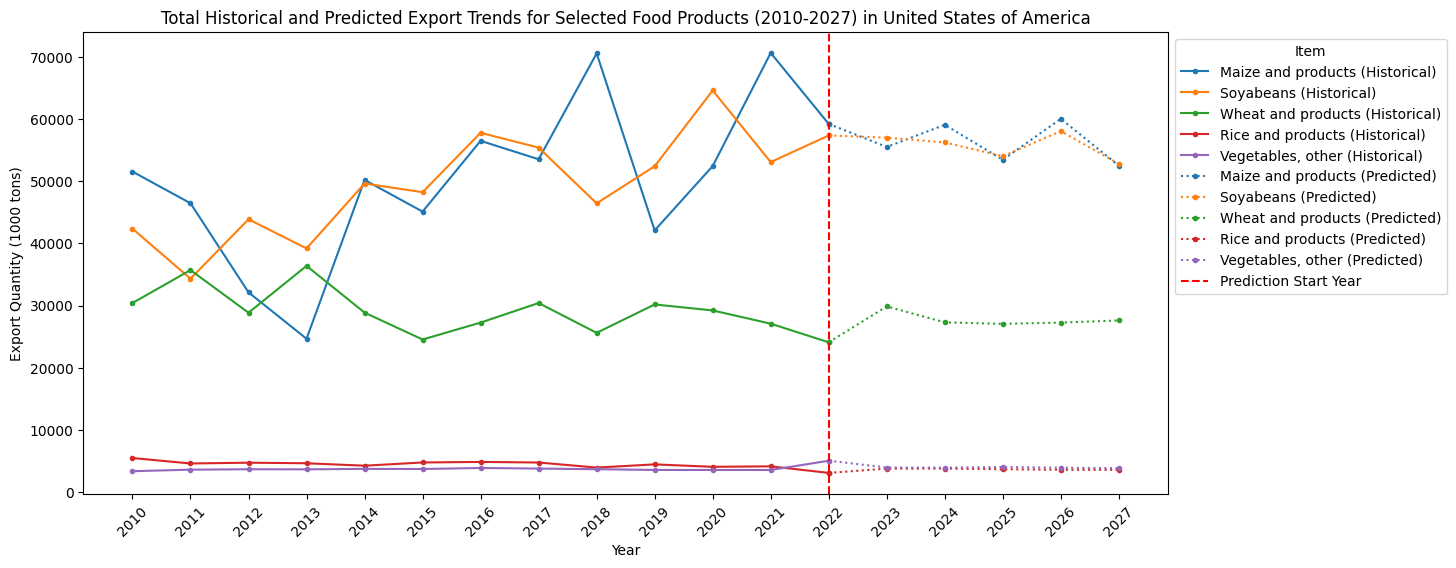

In [26]:
file_path = '/content/drive/MyDrive/FAOSTAT_data_en_3-15-2025.csv'

# Reload the dataset
df = pd.read_csv(file_path)

# Filter only export quantity data for a specific country (USA) and selected agricultural products
selected_country = "United States of America"
selected_items = ["Maize and products", "Soyabeans", "Wheat and products", "Rice and products", "Vegetables, other"]

df_exports = df[(df["Element"] == "Export quantity") & (df["Area"] == selected_country) & (df["Item"].isin(selected_items))]

# Remove unnecessary columns
df_exports = df_exports.drop(columns=["Domain Code", "Domain", "Unit", "Flag", "Flag Description", "Note"], errors="ignore")

# Encode categorical features (Item)
le_item = LabelEncoder()
df_exports["Item"] = le_item.fit_transform(df_exports["Item"])

# Retrieve the encoded values for selected items
selected_items_encoded = le_item.transform([item for item in selected_items if item in le_item.classes_])

# Filter dataset for selected items
df_selected = df_exports[df_exports["Item"].isin(selected_items_encoded)]

# Aggregate actual export values per year
df_selected_summary = df_selected.groupby(["Year", "Item"])["Value"].sum().reset_index()

# Create lag features (previous years' exports as predictors)
df_selected_summary = df_selected_summary.sort_values(by=["Item", "Year"])
df_selected_summary["Export_Lag_1"] = df_selected_summary.groupby(["Item"])["Value"].shift(1)
df_selected_summary["Export_Lag_2"] = df_selected_summary.groupby(["Item"])["Value"].shift(2)
df_selected_summary["Export_Lag_3"] = df_selected_summary.groupby(["Item"])["Value"].shift(3)

# Drop NaN values caused by shifting
df_selected_summary.dropna(inplace=True)

# Define features (X) and target (y)
features = ["Year", "Export_Lag_1", "Export_Lag_2", "Export_Lag_3"]
target = "Value"

X = df_selected_summary[features]
y = df_selected_summary[target]

# Split into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict future exports for the next 5 years
future_years = 5
future_predictions = []
current_year = df_selected_summary["Year"].max()

# Use the last known data as a base for future predictions
future_df = df_selected_summary[df_selected_summary["Year"] == current_year].copy()

for i in range(1, future_years + 1):
    next_year = current_year + i
    future_df["Year"] = next_year  # Update year

    # Shift lag features for future prediction
    future_df["Export_Lag_3"] = future_df["Export_Lag_2"]
    future_df["Export_Lag_2"] = future_df["Export_Lag_1"]
    future_df["Export_Lag_1"] = future_df["Value"]  # Last year's export

    # Drop original target variable
    future_df.drop(columns=["Value"], inplace=True)

    # Predict exports for the next year
    future_df["Predicted_Export"] = rf_model.predict(future_df[features])

    # Save the predictions
    future_predictions.append(future_df.copy())

    # Update Value column for next year's prediction
    future_df["Value"] = future_df["Predicted_Export"]

# Combine all future predictions into a single DataFrame
future_export_fixed = pd.concat(future_predictions)

# Convert encoded item names back to original names
future_export_fixed["Item"] = le_item.inverse_transform(future_export_fixed["Item"])

# Aggregate future predicted values per year
future_export_fixed = future_export_fixed.groupby(["Year", "Item"])["Predicted_Export"].sum().reset_index()

# Rename columns for consistency
historical_export_usa = df_selected.groupby(["Year", "Item"])["Value"].sum().reset_index()
historical_export_usa["Item"] = le_item.inverse_transform(historical_export_usa["Item"])
historical_export_usa.rename(columns={"Value": "Export_Value"}, inplace=True)
future_export_fixed.rename(columns={"Predicted_Export": "Export_Value"}, inplace=True)

# Fix the transition from 2022 to 2023 by explicitly inserting 2022's last known values into 2023
for item in selected_items:
    last_value_2022 = historical_export_usa[(historical_export_usa["Year"] == 2022) &
                                            (historical_export_usa["Item"] == item)]["Export_Value"].values
    if len(last_value_2022) > 0:
        new_row = {"Year": 2022, "Item": item, "Export_Value": last_value_2022[0]}
        future_export_fixed = pd.concat([pd.DataFrame([new_row]), future_export_fixed], ignore_index=True)

# Re-sort the dataset so 2022 transitions smoothly into 2023
future_export_fixed = future_export_fixed.sort_values(by=["Year", "Item"])

# Combine the fixed future data with historical data
combined_export_fixed = pd.concat([historical_export_usa, future_export_fixed], ignore_index=True)

# Pivot tables for plotting
historical_export_pivot = historical_export_usa.pivot(index="Year", columns="Item", values="Export_Value")
future_export_pivot = future_export_fixed.pivot(index="Year", columns="Item", values="Export_Value")

# Merge actual export data with predicted data for continuity
extended_future_export = future_export_pivot.copy()

# Insert the last known value from the historical data for continuity
for item in selected_items:
    if item in historical_export_pivot.columns and item in extended_future_export.columns:
        if current_year in historical_export_pivot.index:  # Ensure the current year exists in historical data
            last_actual_value = historical_export_pivot.loc[current_year, item]
            extended_future_export.loc[current_year, item] = last_actual_value  # Maintain continuity

# Re-sort index so the historical data transitions smoothly into predictions
extended_future_export = extended_future_export.sort_index()

# Generate a full timeline of years from historical data to predictions
full_years = list(range(historical_export_pivot.index.min(), extended_future_export.index.max() + 1))

# Plot both Historical and Predicted Export Trends for the USA
plt.figure(figsize=(14, 6))

# Generate a color map for consistency
colors = plt.cm.tab10.colors
color_map = {item: colors[i % len(colors)] for i, item in enumerate(selected_items)}

# Plot historical data
for item in selected_items:
    if item in historical_export_pivot.columns:
        plt.plot(historical_export_pivot.index, historical_export_pivot[item],
                 marker='.', linestyle='-', color=color_map[item], label=f"{item} (Historical)")

# Plot predicted data
for item in selected_items:
    if item in extended_future_export.columns:
        plt.plot(extended_future_export.index, extended_future_export[item],
                 marker='.', linestyle='dotted', color=color_map[item], label=f"{item} (Predicted)")

# Formatting
plt.xlabel("Year")
plt.ylabel("Export Quantity (1000 tons)")
plt.title(f"Total Historical and Predicted Export Trends for Selected Food Products (2010-2027) in {selected_country}")
plt.axvline(x=current_year, color='red', linestyle="--", label="Prediction Start Year")

# Ensure X-axis has all years
plt.xticks(full_years, rotation=45)
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}'))

plt.legend(title="Item", loc="upper left", bbox_to_anchor=(1, 1))

# Show the improved plot with historical and predicted trends for USA
plt.show()


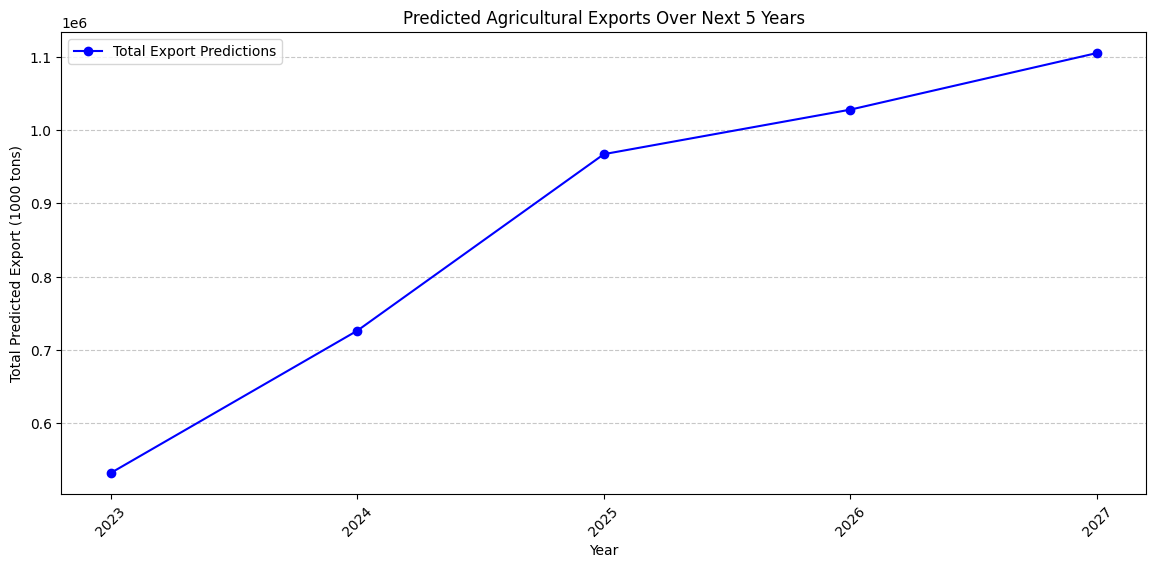

In [28]:
# import necessary libraries since the execution state was reset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Reload dataset
df = pd.read_csv(file_path)

# Filter only export quantity data
df_exports = df[df["Element"] == "Export quantity"].copy()

# Drop unnecessary columns
df_exports.drop(columns=["Domain Code", "Domain", "Unit", "Flag", "Flag Description", "Note", "Element"], inplace=True)

# Encode categorical features (Area, Item, Item Code)
label_encoders = {}
for col in ["Area", "Item", "Item Code (FBS)"]:
    le = LabelEncoder()
    df_exports[col] = le.fit_transform(df_exports[col])
    label_encoders[col] = le

# Sort data by Area and Year
df_exports = df_exports.sort_values(by=["Area", "Year"])

# Create lag features (Use previous years' export values as predictors)
def create_lag_features(df, lag_years=3):
    for lag in range(1, lag_years + 1):
        df[f'Export_Lag_{lag}'] = df.groupby("Area")["Value"].shift(lag)
    return df

df_exports = create_lag_features(df_exports, lag_years=3)

# Drop rows with NaN values (caused by shifting)
df_exports.dropna(inplace=True)

# Define features (X) and target (y)
features = ["Area Code (M49)", "Area", "Item Code (FBS)", "Item", "Year", "Export_Lag_1", "Export_Lag_2", "Export_Lag_3"]
target = "Value"

X = df_exports[features]
y = df_exports[target]

# Split into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict future exports for the next 5 years
future_years = 5
latest_year = df_exports["Year"].max()

# Create a base dataset for predictions
future_df = df_exports[df_exports["Year"] == latest_year].copy()

# Store results
predictions = []

for i in range(1, future_years + 1):
    future_year = latest_year + i
    future_df["Year"] = future_year

    # Shift lag features for next year prediction
    for lag in range(1, 3):
        future_df[f'Export_Lag_{lag+1}'] = future_df[f'Export_Lag_{lag}']
    future_df["Export_Lag_1"] = future_df["Value"]

    # Drop original target variable
    future_df.drop(columns=["Value"], inplace=True)

    # Predict exports for the current future year
    future_df["Predicted_Export"] = rf_model.predict(future_df[features])

    # Store the predictions
    predictions.append(future_df[["Area", "Year", "Predicted_Export"]].copy())

    # Update future_df with new predicted values for the next iteration
    future_df["Value"] = future_df["Predicted_Export"]

# Combine results into one dataframe
future_predictions = pd.concat(predictions)

# Convert encoded Area names back
future_predictions["Area"] = label_encoders["Area"].inverse_transform(future_predictions["Area"])

# Plot predicted exports with properly formatted X-axis
plt.figure(figsize=(14, 6))

# Group by year and sum exports
yearly_exports = future_predictions.groupby("Year")["Predicted_Export"].sum()

plt.plot(yearly_exports.index, yearly_exports.values, marker='o', linestyle='-', color="b", label="Total Export Predictions")

# Formatting
plt.xlabel("Year")
plt.ylabel("Total Predicted Export (1000 tons)")
plt.title("Predicted Agricultural Exports Over Next 5 Years")
plt.xticks(yearly_exports.index, rotation=45)
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}'))
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend()

# Show the plot
plt.show()
